In [21]:
import os
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

In [22]:

def get_predicted_ratings(games, pi_values):
    models = [
        'newman', 'newman_leadership', 'higher_order_newman', 
        'higher_order_leadership', 'spring_rank', 'spring_rank_leadership', 
        'page_rank', 'page_rank_leadership', 'point_wise'
    ]
    
    predicted_rankings = {}
    for model in models:
        predictions = get_predictions(model, games, pi_values)
        predicted_rankings[model] = list(predictions.values())

    return predicted_rankings

def get_distributions_luxe_axiom(N, M, K1, K2, leadership=False):

    if leadership:
        pi_values, data = generate_leadership_model_instance(N, M, K1, K2)
    else:
        pi_values, data = generate_model_instance(N, M, K1, K2)

    flipped_games = [game[::-1] for game in data]

    data.extend(flipped_games)

    return get_predicted_ratings(data, pi_values)

def get_distributions(N, M, K1, K2, leadership=False):
    if leadership:
        pi_values, data = generate_leadership_model_instance(N, M, K1, K2)
    else:
        pi_values, data = generate_model_instance(N, M, K1, K2)

    return get_predicted_ratings(data, pi_values)

def plot_distributions(predictions):
    num_models = len(predictions)
    colors = sns.color_palette("husl", num_models)  # Generate a color palette with unique colors

    # Create subplots
    fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=False)

    # Plot each distribution independently
    for i, (model, preds) in enumerate(predictions.items()):
        row = i // 3
        col = i % 3
        sns.kdeplot(preds, ax=axs[row, col], fill=True, color=colors[i])
        axs[row, col].set_title(f'Distribution of Predicted Ratings for {model}')
        axs[row, col].set_xlabel('Predicted Rantings')
        axs[row, col].set_ylabel('Density')

    plt.tight_layout()
    plt.show()






# Standard

{'newman': [4.879214054784796, 0.14192124639683568, 0.8716610538022311, 2.474173642222245, 0.17565192399558344, 1.4658402987250443, 0.6928117369391315, 0.20177506734212808, 1.039793818639041, 5.3688311304905305, 0.23473309906977377, 1.1418098680275974, 1.6245657854453286, 1.192939262171125, 0.7780705107525315, 0.3531877074107257, 0.48695535790218303, 0.555406591819955, 0.621312714106789, 0.21267071254014763, 0.2508378642189208, 3.4434509986991944, 0.45034584876106043, 2.8724230783569493, 0.30404233778602374, 1.7854776078075638, 0.14376621666062986, 0.6089807204305815, 0.4094529012283602, 0.8008250702200913, 0.7058019421412616, 1.426921029484509, 3.1501653587832887, 0.8662567794265453, 1.8303802837818428, 2.970502938541077, 3.5255095391354447, 0.9954973964725936, 1.0433694957090704, 2.4287442462436943, 0.9999598739600929, 0.537778917319579, 5.245526776320504, 2.012261306725648, 5.9726304658795115, 0.9999598739600929, 0.6646819197389612, 0.4861249213691484, 0.2366146732016905, 1.02952504

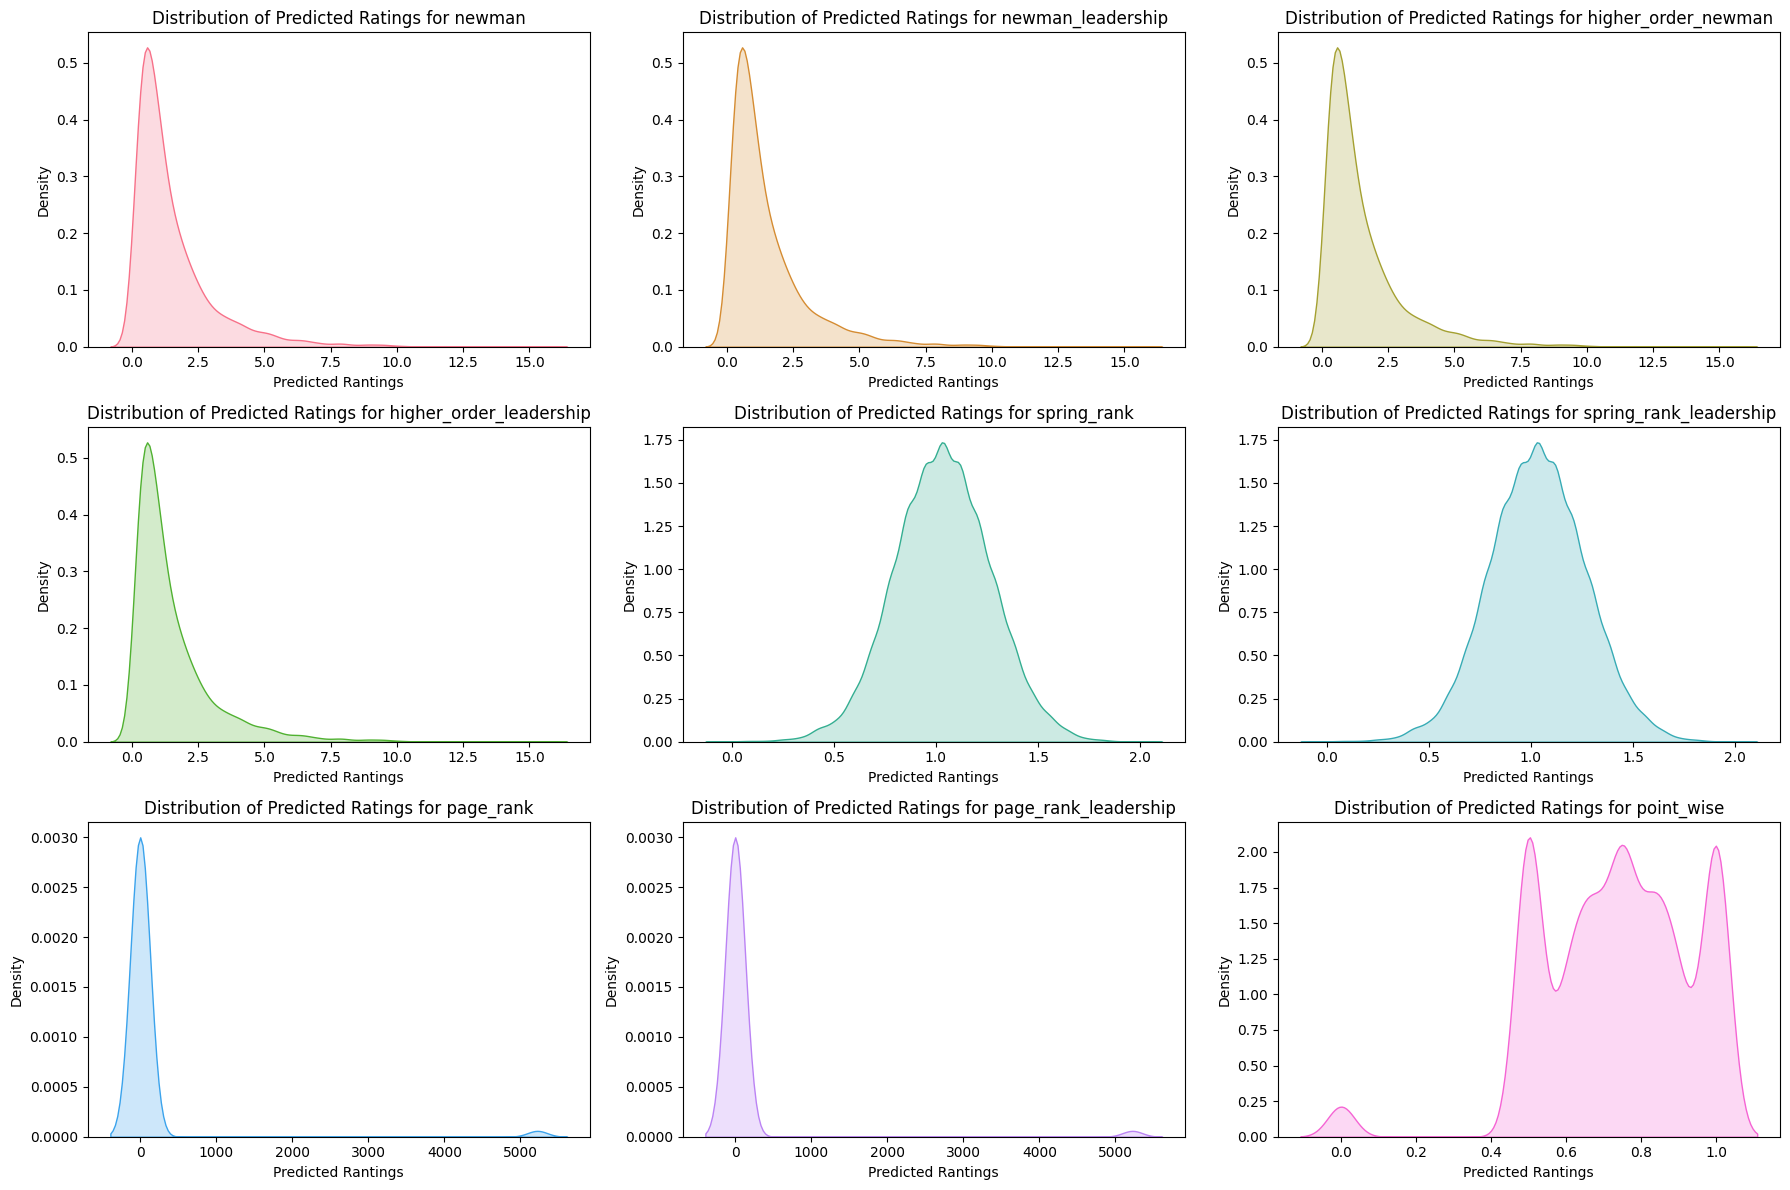

In [23]:
N, M, K1, K2 = 5000, 10000, 2, 2
predictions = get_distributions(N,M,K1,K2)
print(predictions)
plot_distributions(predictions)

### Luxes Axiom

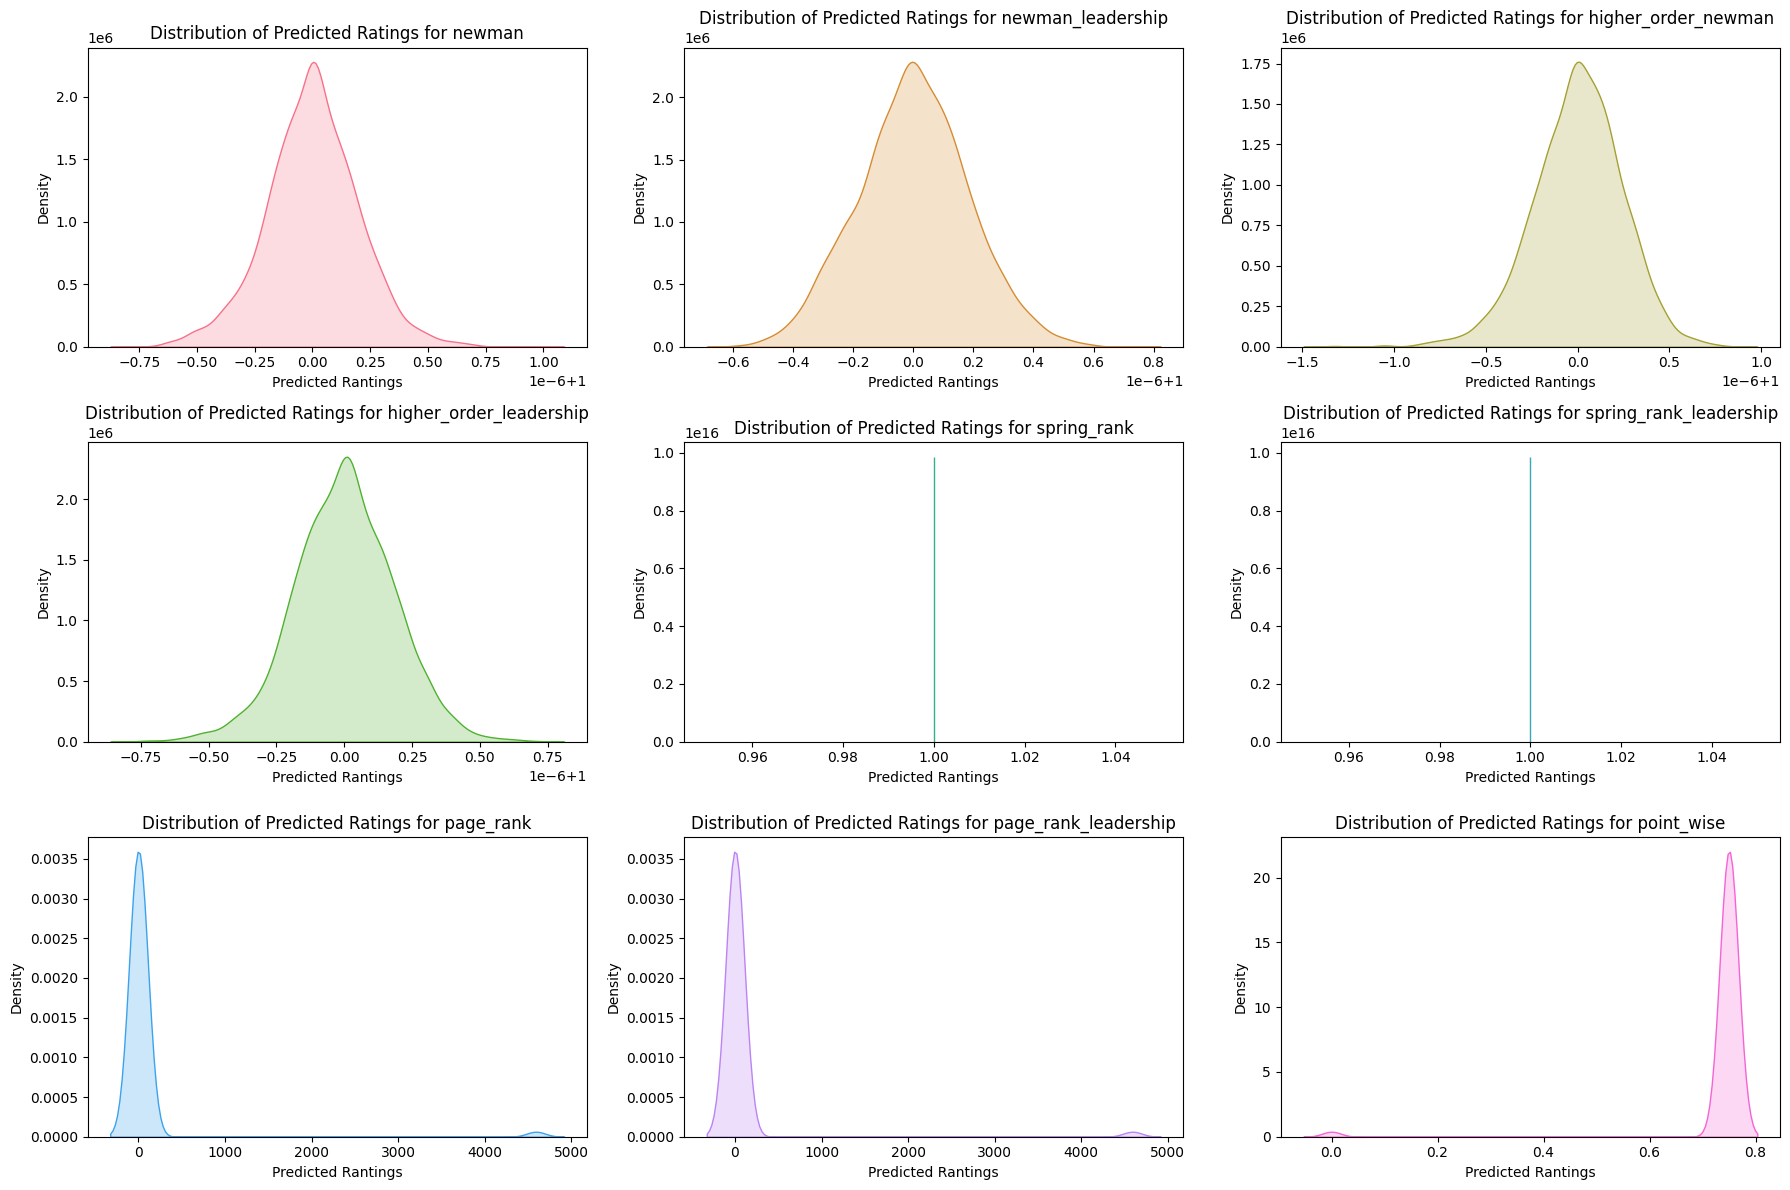

In [24]:
N, M, K1, K2 = 5000, 10000, 2, 2
predictions = get_distributions_luxe_axiom(N,M,K1,K2)
plot_distributions(predictions)


# Higher Order

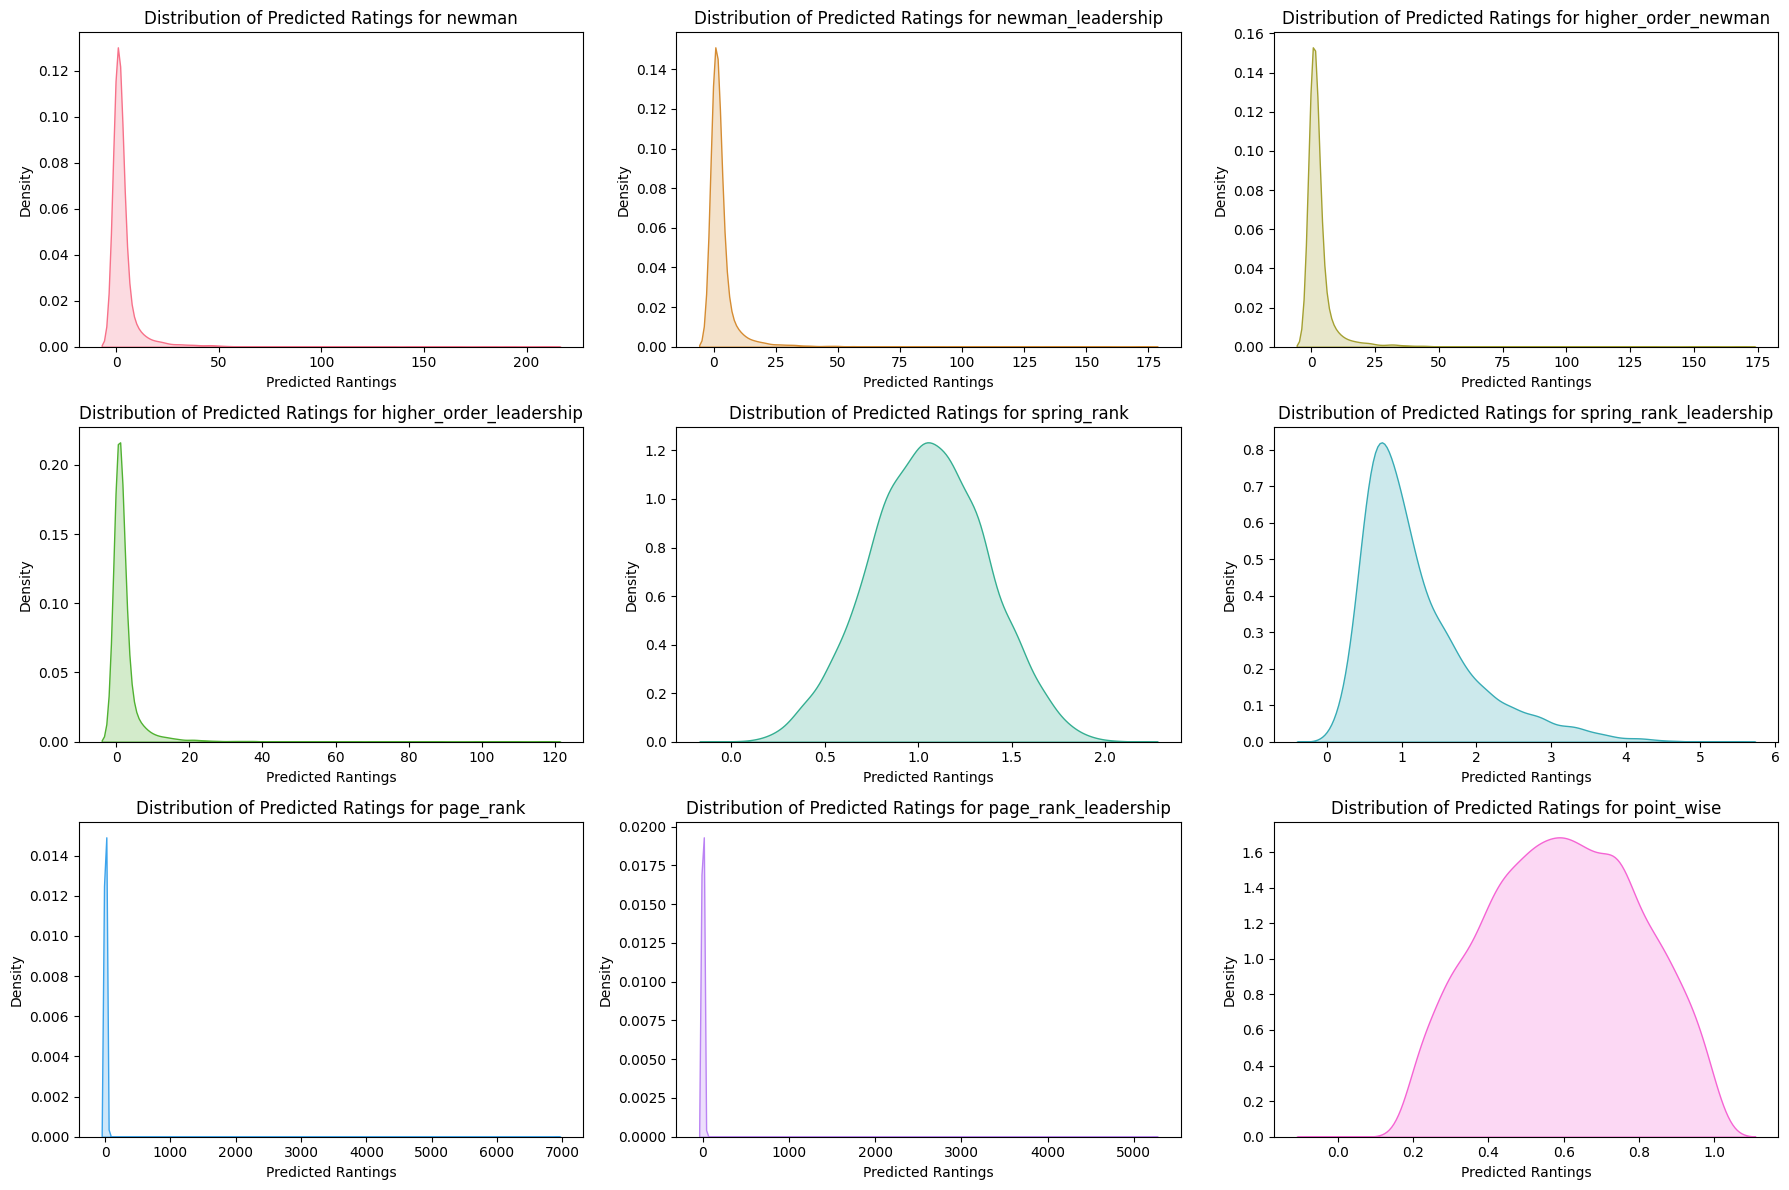

In [25]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions(N,M,K1,K2)
plot_distributions(predictions)

### Luxes Axiom

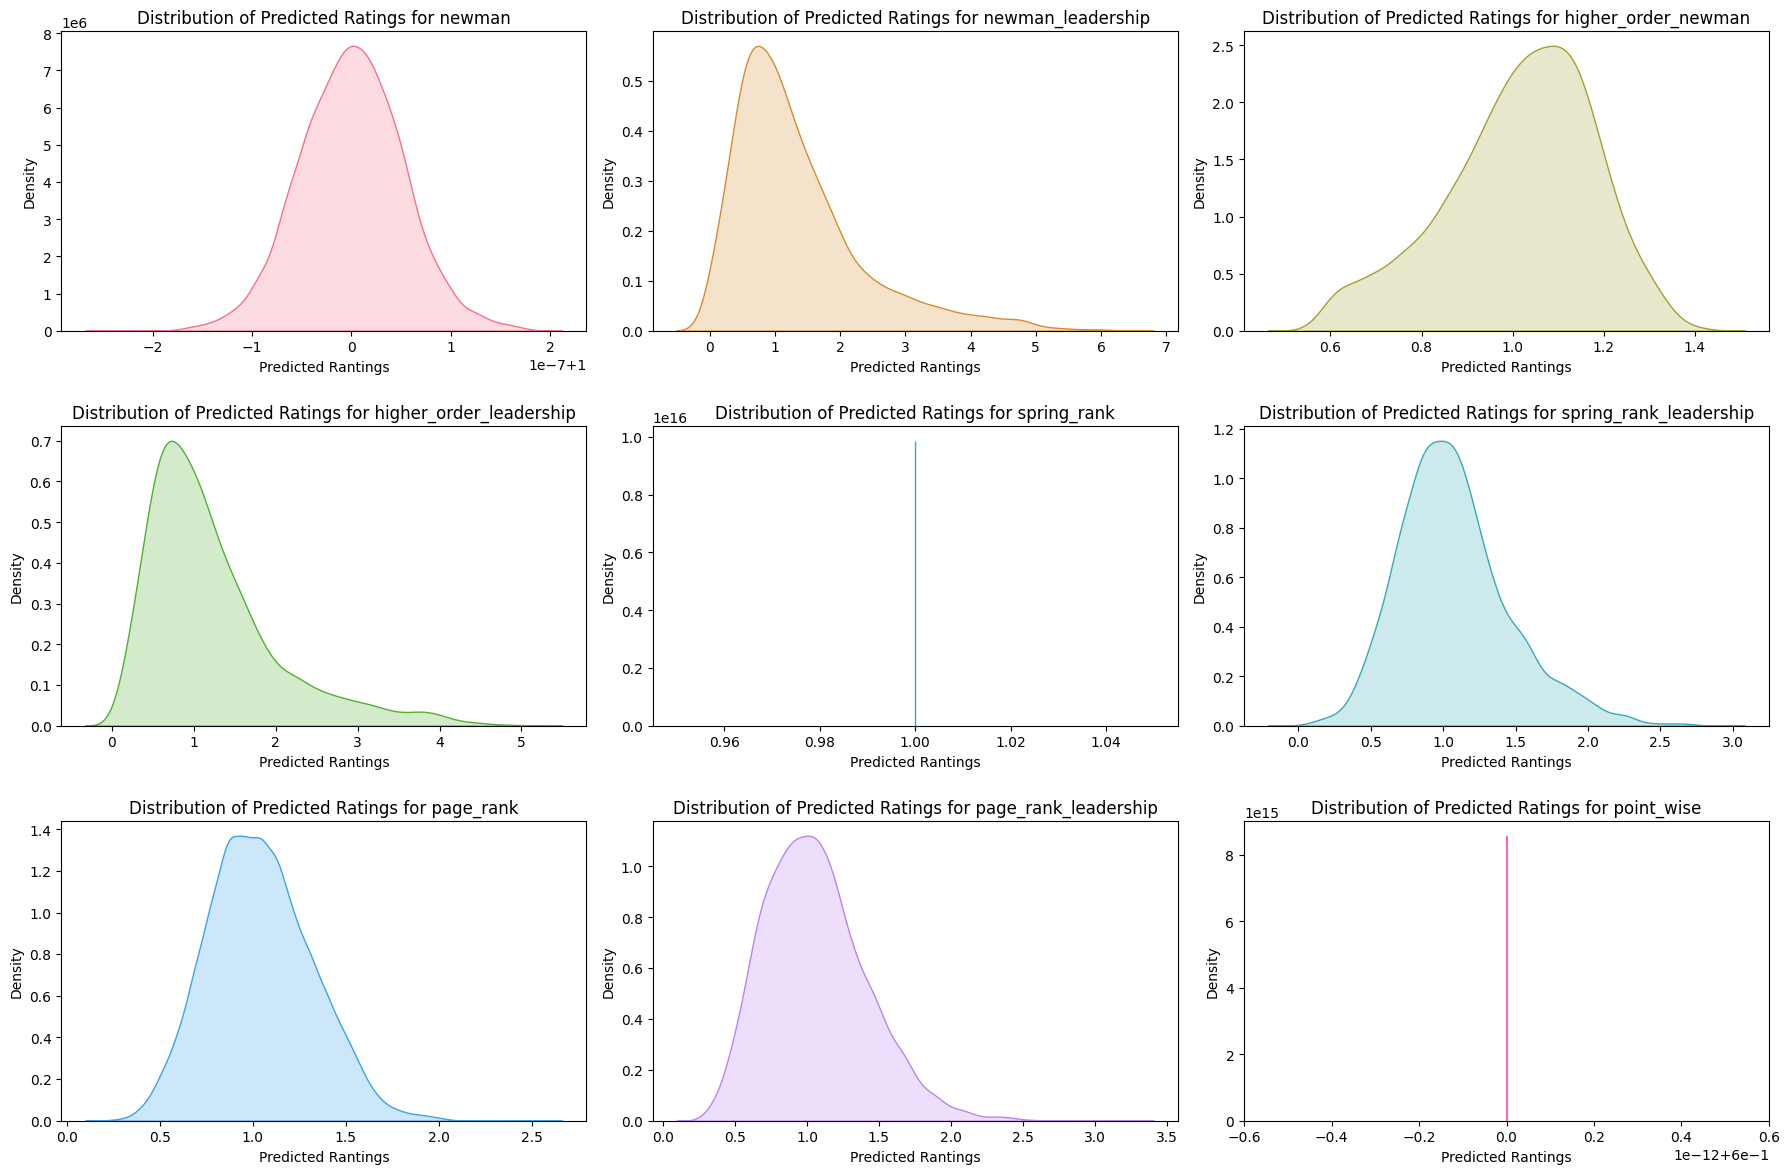

In [26]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions_luxe_axiom(N,M,K1,K2)
plot_distributions(predictions)

# Higher Order Leadership

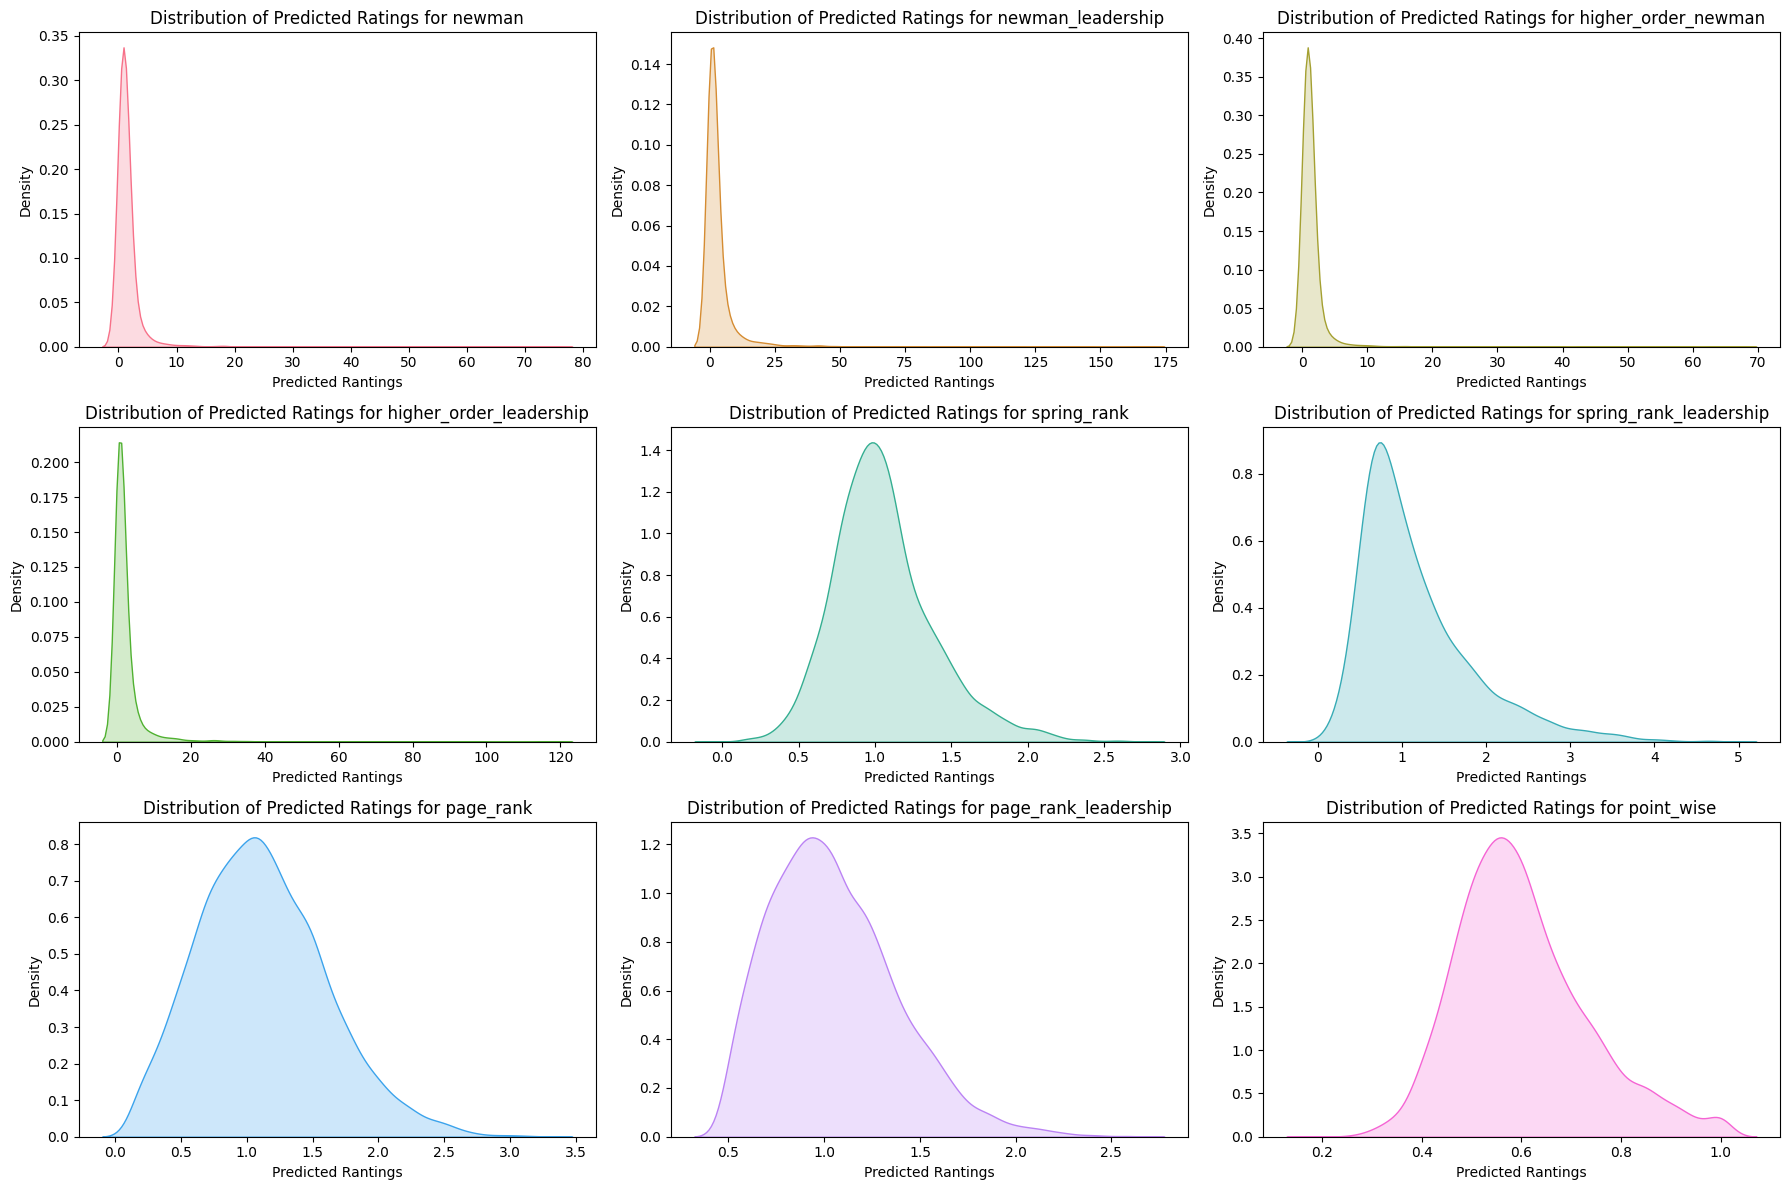

In [27]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions(N,M,K1,K2, leadership=True)
plot_distributions(predictions)

### luxes Axiom

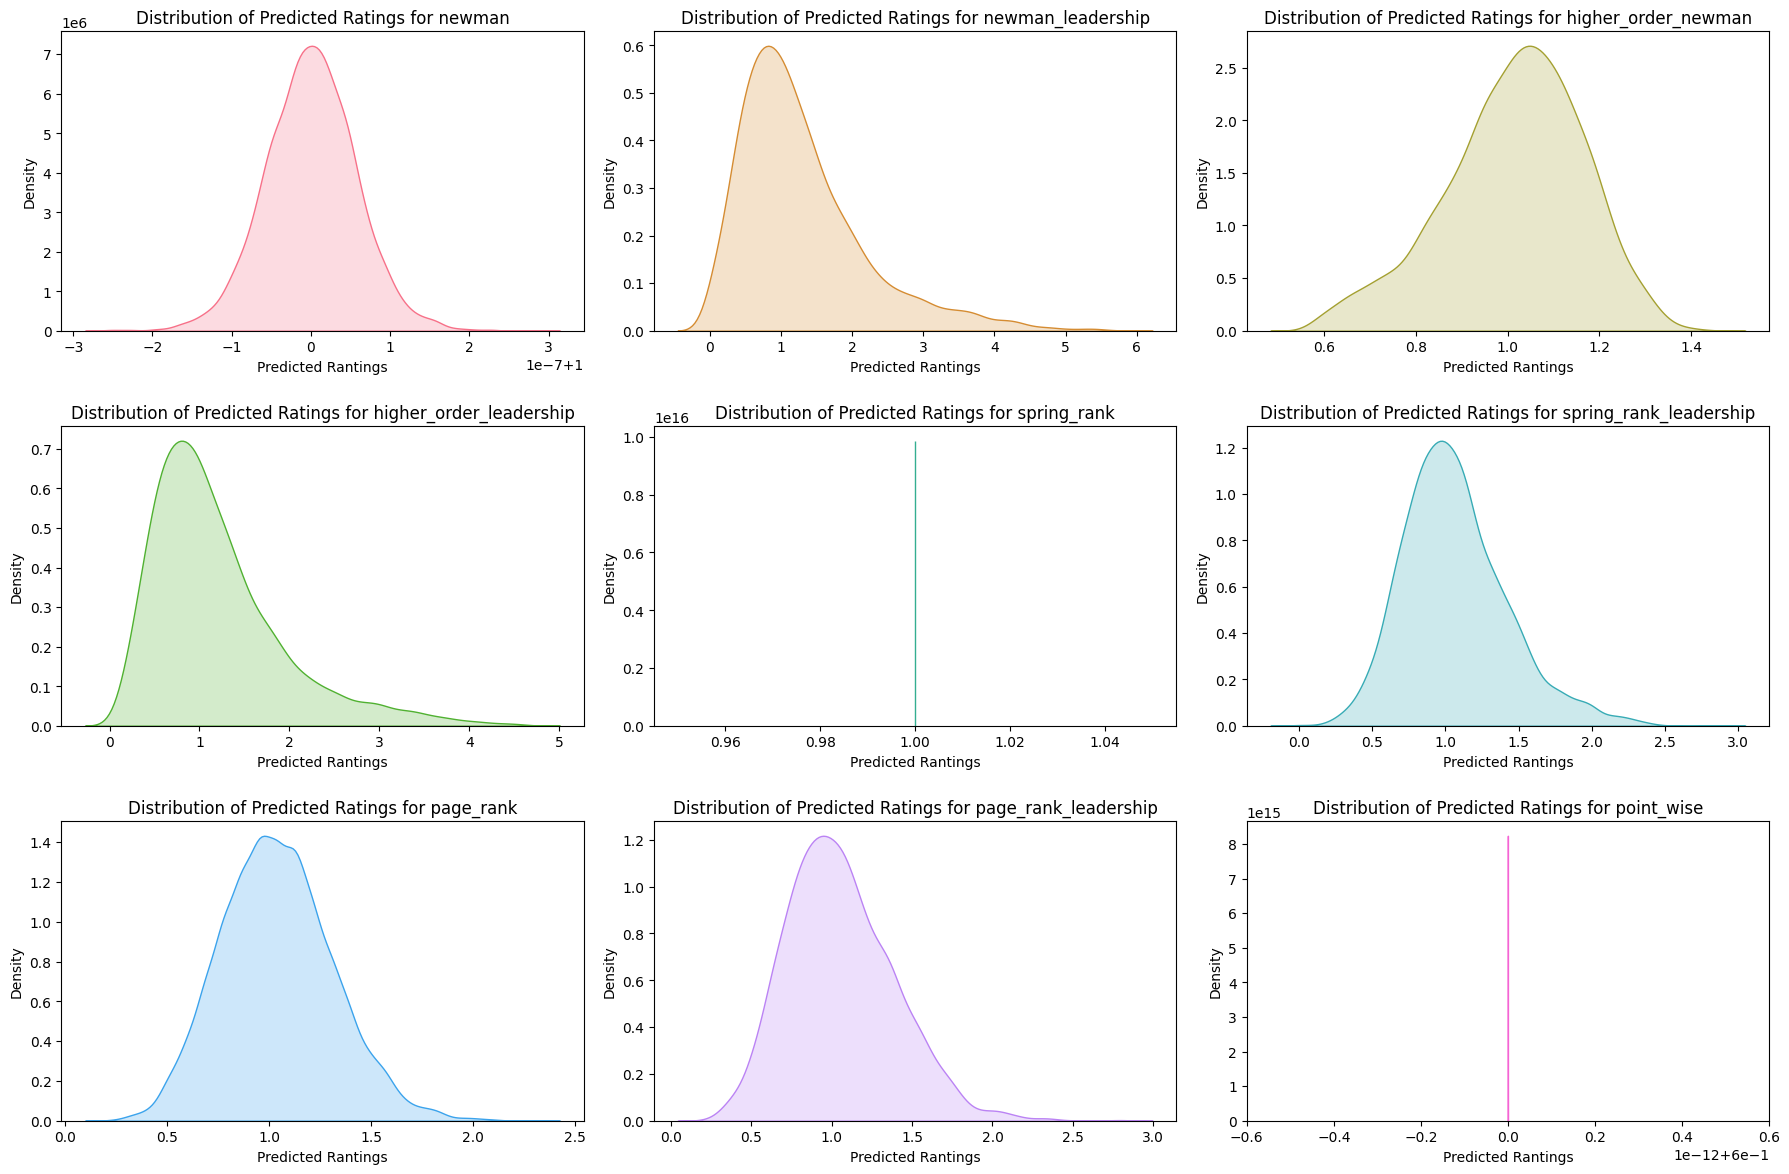

In [28]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions_luxe_axiom(N,M,K1,K2, leadership=True)
plot_distributions(predictions)